# REGRESIÓN LINEAL
## Wilgen Correa
________________________________________________________________________

## 1. Introducción.
## 2. Breve historia.
## 3. El planteamiento del algoritmo.
## 4. Desarrollar un ejemplo de regresión lineal.
## 5. Conclusiones.
___________________________________________________________

## **1. Introducción**

Representa un ajuste o relación lineal entre dos o mas variables en un modelo matemático usado para aproximar la relación de dependencia, 
entre una variable dependiente $y$, y una variable independiente $x$.

Entendiendo que lo que llamamos predicción o pronóstico (Probabilidad en el futuro que algo suceda) en las situaciones que nos compete estudiar la basaremos en conocimiento que aplicaremos para el desarrollo de nuestro estudio en temas de Inteligencia Artificial. Y podemos partir de una relación como la que se describe a continuación:

$Variable Dependiente = Constante + Pendiente * Variable Independiente + Error$



# **2. Breve historia**

La **regresión lineal** es un campo de estudio el cual se centra en la **relación estadística** entre dos **variables continuas**, cuando ya se involucran más de una variable predictora, se establece una **relación lineal Múltiple**, se puede llevar el estudio de relación de **$variables$**.  
![](https://i.imgur.com/Ud08a8N.png)




## Teoría
La regresión lineal se puede decir que es una técnica basada en parámetros, para ejemplificar conocemos que una línea necesita 2 parámetros. cuya formula es $y=wx +b$

Lo que denominamos ***aprendizaje*** se basa en encontrar los mejores parámetros (***coeficientes*** -- $w$)  que minimicen la medida del error.

* $y= b + wx$

es así, que cuando tengamos un dato con *N* variables, llamaremos al dato $x$. Se debe tener en cuenta que se expanden también los parámetros $w$.

![](https://i.imgur.com/D0FD14K.png)



## ***3. El planteamiento del algoritmo.***

1. Importar las librerias a utilizar
2. Cargar un archivo como fuente de datos (formato csv) se carga como un dataset de Pandas.
3. A partir de las características de una muestra de datos de sedimento de tierra y otros materiales rocosos, en la región de Chichina, se toma el conjunto de información de algunas variables como: Tipo de tierra  espesor de la capa enterrada, porcentaje de arcilla sedimentada, y la permeabilidad del suelo; con el objetivo de evaluar un modelo de regresión lineal de acuerdo al aprendizaje conceptual del diplomado, a continuación se describen las $variables$ a tener en cuenta:

*  Se tomaran las columnas de: 

*   DESCRIPTIO: Descripción de la tierra (arcillosa,rocosa metasedimentada,etc.)
* THICKNESS : Espesor de la capas enterradas (mts).
* PERCLAY   : Porcentaje de arcillas (%).
* PERMEABILI: Permeabilidad (mts/dias).

###· Hacer una ***Regresión Lineal Simple*** y su gráfica.
###.  Hacer una ***Regresión Lineal Múltiple*** y su gráfica.




## **4. Desarrollar un ejemplo de regresión lineal.**


### 4.1 Importar las librerias a utilizar

In [92]:
# importar las librerias necesarias 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### 4.1 Cargar un archivo como fuente de datos (formato csv).  y se carga como un dataset de Pandas.

In [93]:
# Cargamos los datos del archivo CSV
from google.colab import drive

ruta='https://raw.githubusercontent.com/DiplomadoAI-DL-UNAL2021/wilgencorrea/main/taller_02_RL/barrenos.csv'

data = pd.read_csv(ruta)
# Num Dimensiones y cantidad de registros que contiene
print('cantidad de Registros y columnas')
data.shape

cantidad de Registros y columnas


(203, 11)

# 4.2. Ver información detallada y estadística de los datos

*  Se tomaran las columnas de: 
* DESCRIPTIO: Descripción de la tierra (arcillosa, rocosa metasedimentada, etc.)
* THICKNESS : Espesor de la capas enterradas (mts).
* PERCLAY   : Porcentaje de arcillas (%).
* PERMEABILI: Permeabilidad (mts/dias).

#### Información detallada de los 5 primeros registros!!

In [94]:
data.head(5)

,OBJECTID,BOREHOLE,X,Y,GEOL,longitud,latitud,DESCRIPTIO,THICKNESS,PERCCLAY,PERMEABILI
0,1,Bhnr1,830557,1047819,kclp,-75.60529,5.026840,Chloritic/amfibolitic schists,8,60,0.0
1,2,Bhnr2,834314,1047725,inch,-75.57142,5.026069,Gneissic intrusive,4,20,0.9
2,3,Bhnr3,835665,1047825,kis,-75.55925,5.027000,Metasedimentary rock,7,45,0.0
3,4,Bhnr4,836846,1047706,kis,-75.54860,5.025949,Metasedimentary rock,5,45,0.0
4,5,Bhnr5,835888,1047913,qal,-75.55724,5.027801,Recent alluvial material,20,0,3.5


#### Información estadística de los datos 

In [95]:
data.describe()

,OBJECTID,X,Y,longitud,latitud,THICKNESS,PERCCLAY,PERMEABILI
count,203.000000,203.000000,2.030000e+02,203.000000,203.000000,203.000000,203.000000,203.000000
mean,102.000000,833251.916256,1.044356e+06,-75.580929,4.995594,11.576355,35.320197,0.846798
std,58.745213,2742.846709,2.025651e+03,0.024717,0.018321,11.950717,19.587856,1.233255
min,1.000000,827291.000000,1.041006e+06,-75.634610,4.965194,2.000000,0.000000,0.000000
25%,51.500000,831482.000000,1.042619e+06,-75.596915,4.979871,4.000000,20.000000,0.000000
50%,102.000000,833656.000000,1.044331e+06,-75.577270,4.995415,7.000000,35.000000,0.100000
75%,152.500000,835657.500000,1.045878e+06,-75.559315,5.009371,9.000000,55.000000,1.000000
max,203.000000,836987.000000,1.047913e+06,-75.547210,5.027801,40.000000,80.000000,3.500000


# 4.3. Quitar datos no relevantes a las características de los datos de entrada

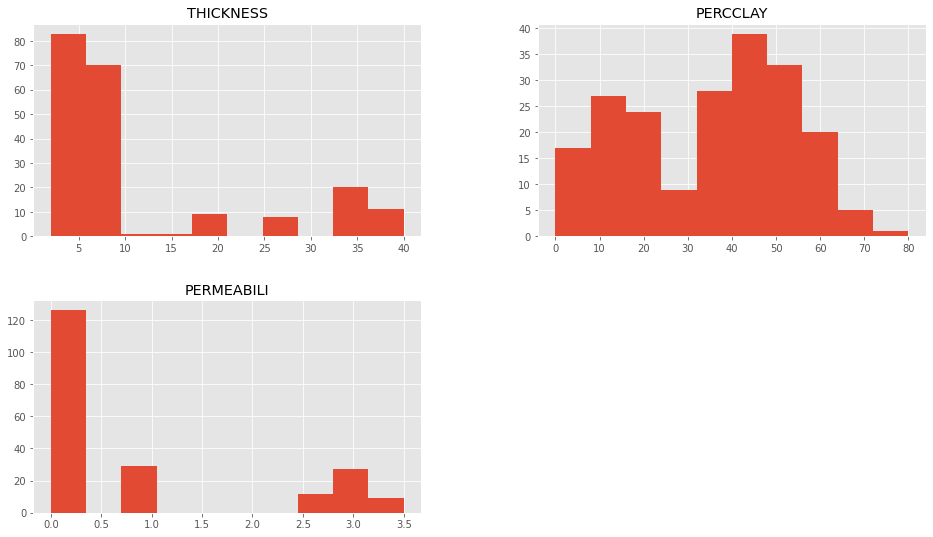

In [96]:
data.drop(['OBJECTID','X','Y','longitud','latitud'],1).hist()
plt.show()

# 4.4. Realizar el gráfico de dispersión
### De acuerdo a la conjunto de datos de **ENTRADA** se realiza la visualización del cuadro de dispersión entre el Porcentaje de arcilla (%) - (en $x$) del suelo versus la Permeabilidad del suelo (mts/dias) (en $y$) 

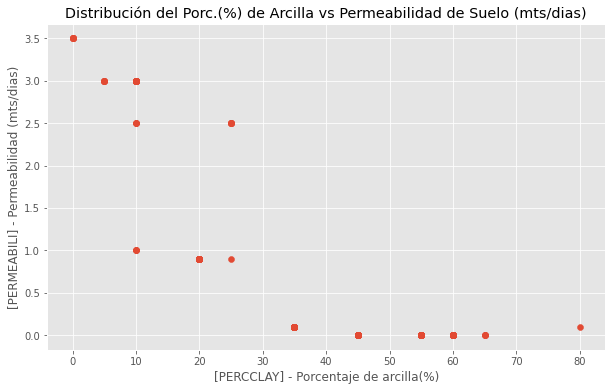

(203, 11)

In [97]:
# Realizar el Gráfico de Dispersión
tamanios=[30,60]

#Seleccion del conjunto de datos para representarlo en el plano cartesiano.
f1 = data["PERCCLAY"].values # datos del Porcentaje de arcilla(%)
f2 = data["PERMEABILI"].values # Permeabilidad (mts/dias).

#Dibujar el conjunto de datos en el plano
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.scatter(f1, f2)
ax.set_title('Distribución del Porc.(%) de Arcilla vs Permeabilidad de Suelo (mts/dias)')
ax.set_xlabel("[PERCCLAY] - Porcentaje de arcilla(%)")
ax.set_ylabel("[PERMEABILI] - Permeabilidad (mts/dias)")
   
plt.show()
data.shape

# 4.5. Hacer una ***Regresión Lineal Simple*** y su gráfica.


*   Asignar los valores a las variables $x$, $y$
*   Se crea el objeto de regresión lineal
*   Se entrena el modelo
*   Se hace la predicción para la interpretación de una línea

## Regresión Lineal Simple: $y = mx +b$ 
## Visualiza Coeficiente ($m$)
## Valor donde corta el eje $y$ (en $x=0$), Término Independiente ($b$)
## Error Cuadrado Medio ($ECM$) (Pretendiendo que su puntuación sea cercana a 0)  
## Varianza (Pretendiendo que su puntuación sea cercana a 1.0)


In [103]:
# se asigna la variable de entrada X para entrenamiento y las etiquetas Y.
dataX = data[["PERCCLAY"]].values # datos del Porcentaje de arcilla(%)

X_train = np.array(dataX)
Y_train = f2

# Se crea el Objeto de regresion lineal
regr = linear_model.LinearRegression()

# Paso para entrenar el modelo lineal 
regr.fit(X_train,Y_train)

#Se hacen las predicciones para la interpretación de una línea
y_pred = regr.predict(X_train)

print('Regresión Lineal Simple:::: y = mx +b ')
# Se visualiza los coeficientes obtenidos.
print('Coeficiente (m): ', regr.coef_)
# Valor donde corta el eje Y (en X=0)
print('Termino Independiente (b): ', regr.intercept_)
# Error Cuadrado Medio, ECM
print("ECM: Error Cuadrado Medio: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Varianza: %.2f' % r2_score(y_train, y_pred))

Regresión Lineal Simple:::: y = mx +b 
Coeficiente (m):  [-0.05394601]
Termino Independiente (b):  2.7521818303158585
ECM: Error Cuadrado Medio: 0.40
Varianza: 0.73


#### Observación: Se puede interpretar que los datos resumen que arroja el modelo en cuanto a su error de confianza es bastante ALTO, y su varianza no es representativa cercana a 1...Por lo cual el modelo todavía no es una representación CONFIABLE!! 

# 4.5.1 Visualización de la gráfica - Regresión Lineal Simple.

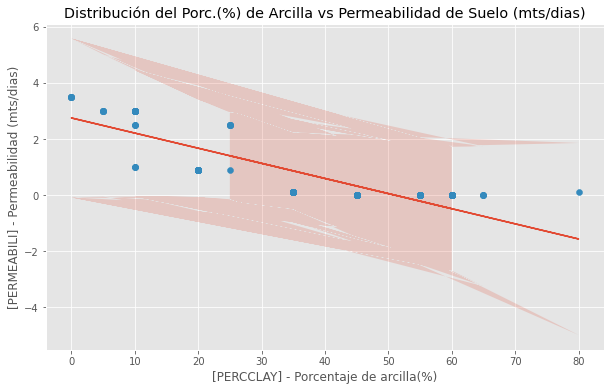

In [99]:
# Predicción de m, b

X_train = data["PERCCLAY"].values
Y_train = f2

# Se aproxima un conjunto de datos según el procedimiento de mínimos cuadrados 
# devolviendo un array NumPy con los coeficientes del polinómio evaluado
m, b = np.polyfit(X_train, Y_train, deg=1)

# Modelo Lineal Simple
y_est = m * X_train + b 
y_err = X_train.std() * np.sqrt(1/len(X_train) +
                          (X_train - X_train.mean())**2 / np.sum((X_train - X_train.mean())**2))

#Dibujar el conjunto de datos en el plano
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.plot(X_train, y_est, '-')
ax.fill_between(X_train, y_est - y_err, y_est + y_err, alpha=0.2)
ax.scatter(X_train, Y_train)
ax.set_title('Distribución del Porc.(%) de Arcilla vs Permeabilidad de Suelo (mts/dias)')
ax.set_xlabel("[PERCCLAY] - Porcentaje de arcilla(%)")
ax.set_ylabel("[PERMEABILI] - Permeabilidad (mts/dias)")

plt.show()


# 4.6. Hacer una ***Regresión Lineal Múltiple*** y su gráfica.

### Se utilizan 2 variables predictivas!!!!! para poder graficar en 3D, en $x$ los valores matriciales de *Porcentaje de arcilla (%)* y *espesor de la capa terrestre enterrada (mts)* respectivamente -- variables: [PERCCLAY][THICKNESS], para el eje de las $z$ colocamos la variable de *permeabilidad del suelo* 

In [100]:
# Para poder graficar en 3D, haremos una variable nueva que será la adición a los valores matriciales de X
 # corres pondiente a los datos de espesor de las capas enterradas [THICKNESS], en metros.
 # y se toma la correlacion en el eje z, de los datos de permeabilidad [PERMEABILI] en (mts/dia)

dataX2 =  pd.DataFrame()
dataX2["PERCCLAY"] = data["PERCCLAY"] # Datos de Porcentaje de arcilla
dataX2["THICKNESS"] = data["THICKNESS"] # Datos de Espesor de las capas enterradas

XY_train = np.array(dataX2)
# se vincula 
z_train = data["PERMEABILI"].values # Datos de permeabilidad

# Se crea un nuevo objeto de regresión lineal con SKLearn 

In [101]:
# Se crea un nuevo objeto de Regresión Lineal multiple
regr2 = linear_model.LinearRegression()
 
# Se entrena el modelo, esta vez, con 2 dimensiones
# Se obtendran 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Se hace la predicción con la que se tendrán puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coeficientes: \n', regr2.coef_)
# Error cuadrático medio
print("ECM - Error cuadrático medio: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Varianza: %.2f' % r2_score(z_train, z_pred))

Coeficientes: 
 [-0.03229392  0.05623289]
ECM - Error cuadrático medio: 0.13
Varianza: 0.91


# Se visualiza un plano en 3 Dimensiones

*   Se Grafica en **AZUL** los puntos en 3D con los puntos de entrenamiento
*   Se Grafica en **ROJOS** los puntos en 3D con los puntos inferidos



Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

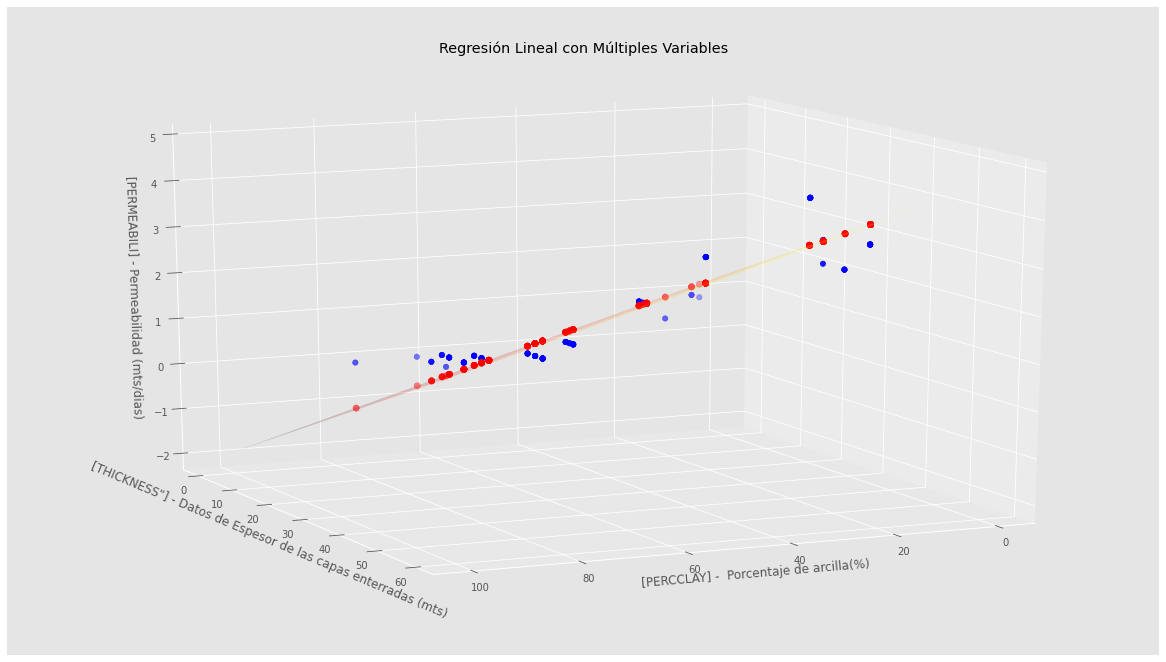

In [102]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Se crea una malla, sobre la cual se grafica el plano
xx, yy = np.meshgrid(np.linspace(0, 100, num=10), np.linspace(0, 60, num=10))
 
# Se calculan los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# Se calculan los correspondientes valores para z. Se Debe sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Se Grafica el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Se grafica en azul los puntos en 3D Con los datos de entrenamiento
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
# Se grafica en rojo, los puntos de inferencia que el modelo propone 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
# Con este resultado se sitúa la "cámara" con la que se visualizan los datos 
ax.view_init(elev=15., azim=65)
        
ax.set_xlabel('[PERCCLAY] -  Porcentaje de arcilla(%)')
ax.set_ylabel('[THICKNESS"] - Datos de Espesor de las capas enterradas (mts) ')
ax.set_zlabel('[PERMEABILI] - Permeabilidad (mts/dias)')
ax.set_title('Regresión Lineal con Múltiples Variables')

## 5. Conclusiones.


1.   **Observación al Modelo Lineal Simple:** Se puede interpretar que los datos resumen que arroja el modelo en cuanto a su error de confianza es bastante **ALTO**, y su varianza no es representativa cercana a 1...Por lo cual el modelo todavía no es una representación **CONFIABLE**!!

1.   **Observación al Modelo Lineal Múltiple:** Continuando con los aspectos de interpretación y dado que en este modelo hay una mejor aproximación y cercanía al error cuadrático múltiple a cero(0), se puede orientar a que este modelo es un poco mas significativo y asertivo que el evaluado anteriormente, siendo **MAS CONFIABLE!** :

> ***ECM - error cuadrático medio: 0.13***

> ***Varianza: 0.91***



# Bibliografía

1. Regresión Lineal Fundamentos: https://sitiobigdata.com/2019/10/25/que-es-la-regresion-lineal/#
2. Regresión lineal - Teoría y ejemplos: https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/
3. Regresión lineal - En español con python
https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
4. matplotlib.org - https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

# Participante: WILGEN CORREA PADILLA